In [8]:
import pandas as pd
import numpy as np

# Load dataset
file_name = "loan_approval_dataset.csv"
df = pd.read_csv(dataset_name)

# Display dataset structure
print("Dataset Columns:", df.columns)
print(df.head())  # Inspect the first few rows

# Identify potential class column (assume it's categorical or has limited unique values)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) == 0:
    raise ValueError("No categorical column found! Specify the class column manually.")

class_column = categorical_cols[0]  # Assuming the first categorical column is the class column
print(f"Using '{class_column}' as the class label column.")

# Extract numerical feature columns
feature_columns = df.select_dtypes(include=[np.number]).columns
if len(feature_columns) == 0:
    raise ValueError("No numerical feature columns found!")

# Select two classes
class_labels = df[class_column].unique()
if len(class_labels) < 2:
    raise ValueError("Dataset must have at least two classes for comparison.")

class1, class2 = class_labels[:2]  # Take the first two unique classes

# Extract feature vectors for each class
feat_vecs_class1 = df[df[class_column] == class1][feature_columns].to_numpy()
feat_vecs_class2 = df[df[class_column] == class2][feature_columns].to_numpy()

# Compute centroids (mean vectors)
centroid1 = np.mean(feat_vecs_class1, axis=0)
centroid2 = np.mean(feat_vecs_class2, axis=0)

# Compute intra-class spread (standard deviation)
spread_class1 = np.std(feat_vecs_class1, axis=0)
spread_class2 = np.std(feat_vecs_class2, axis=0)

# Compute inter-class distance (Euclidean distance between centroids)
interclass_distance = np.linalg.norm(centroid1 - centroid2)

# Print results
print(f"\nClass 1 ({class1}) Centroid: {centroid1}")
print(f"Class 2 ({class2}) Centroid: {centroid2}")
print(f"Spread of Class 1 ({class1}): {spread_class1}")
print(f"Spread of Class 2 ({class2}): {spread_class2}")
print(f"Inter-class Distance: {interclass_distance}")


Dataset Columns: Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2 

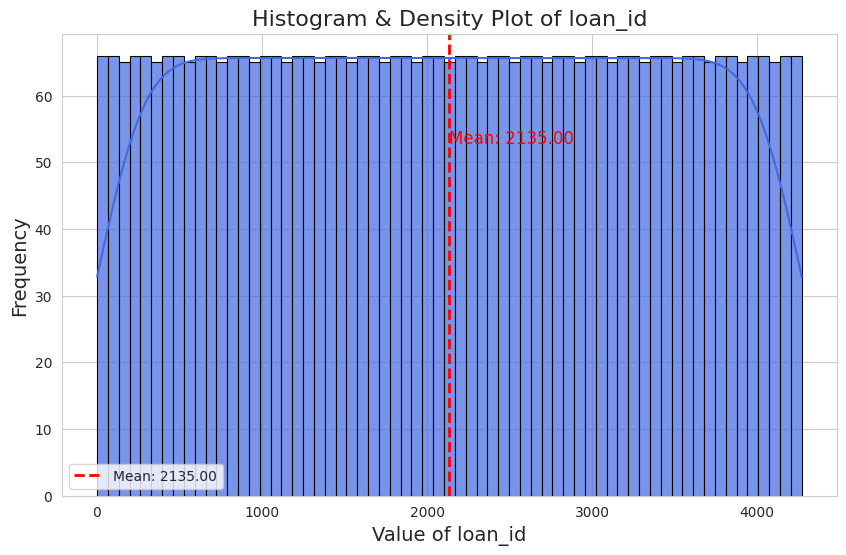

Feature Selected: loan_id
Mean: 2135.0000
Variance: 1518696.6667


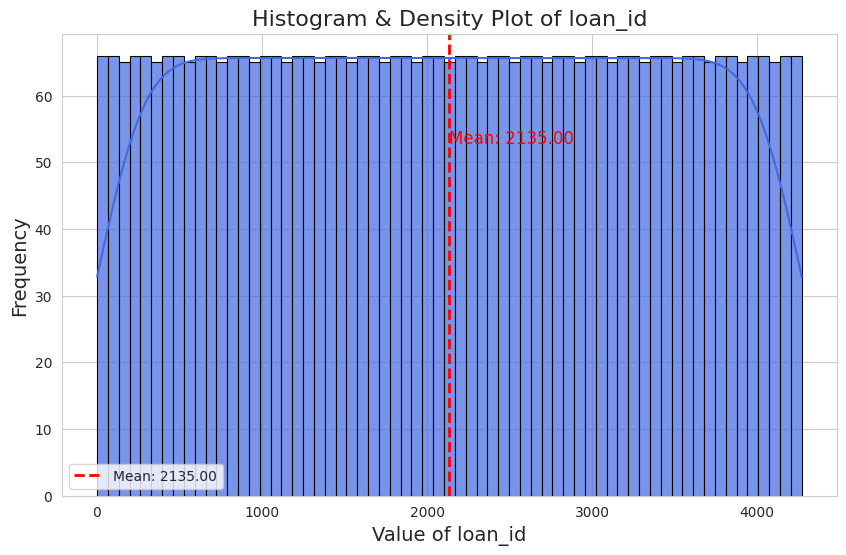

Feature Selected: loan_id
Mean: 2135.0000
Variance: 1518696.6667


In [15]:

# Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(dataset_name)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
if len(numerical_columns) == 0:
    raise ValueError("No numerical feature columns found!")

# Select a numerical feature (modify if needed)
feature = numerical_columns[0]
data = df[feature].dropna()  # Remove NaN values

# Calculate histogram data
num_bins = int(np.sqrt(len(data)))  # Adaptive binning based on data size
hist_values, bin_edges = np.histogram(data, bins=num_bins)

# Calculate statistics
mean_value = np.mean(data)
variance_value = np.var(data)

# Plot histogram with Seaborn styling
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Histogram with KDE (density estimate)
sns.histplot(data, bins=num_bins, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add mean line
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Annotations
plt.text(mean_value, max(hist_values) * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=12)

# Labels and title
plt.xlabel(f"Value of {feature}", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Histogram & Density Plot of {feature}", fontsize=16)
plt.legend()
plt.show()

# Print calculated statistics
print(f"Feature Selected: {feature}")
print(f"Mean: {mean_value:.4f}")
print(f"Variance: {variance_value:.4f}")


# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
if len(numerical_columns) == 0:
    raise ValueError("No numerical feature columns found!")

# Select a numerical feature (modify if needed)
feature = numerical_columns[0]
data = df[feature].dropna()  # Remove NaN values

# Calculate histogram data
num_bins = int(np.sqrt(len(data)))  # Adaptive binning based on data size
hist_values, bin_edges = np.histogram(data, bins=num_bins)

# Calculate statistics
mean_value = np.mean(data)
variance_value = np.var(data)

# Plot histogram with Seaborn styling
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Histogram with KDE (density estimate)
sns.histplot(data, bins=num_bins, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Add mean line
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Annotations
plt.text(mean_value, max(hist_values) * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=12)

# Labels and title
plt.xlabel(f"Value of {feature}", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Histogram & Density Plot of {feature}", fontsize=16)
plt.legend()
plt.show()

# Print calculated statistics
print(f"Feature Selected: {feature}")
print(f"Mean: {mean_value:.4f}")
print(f"Variance: {variance_value:.4f}")


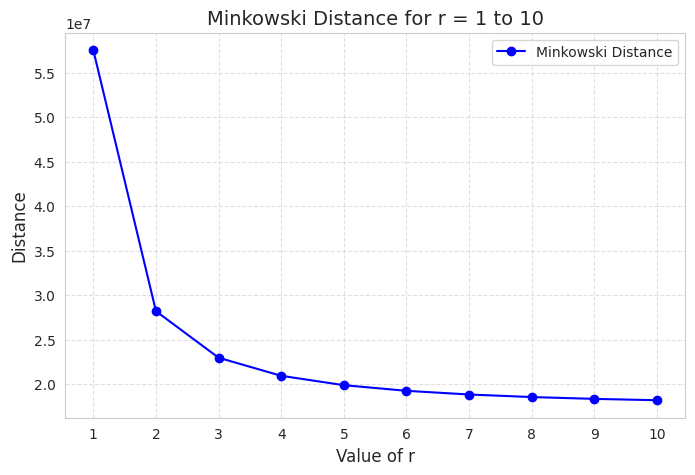

Minkowski Distances:
r = 1, Distance = 57500368.0000
r = 2, Distance = 28215066.8993
r = 3, Distance = 22991389.9720
r = 4, Distance = 20963397.3553
r = 5, Distance = 19911281.0283
r = 6, Distance = 19278599.6579
r = 7, Distance = 18864355.3547
r = 8, Distance = 18578219.1287
r = 9, Distance = 18373296.3675
r = 10, Distance = 18222692.9437


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Load dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(dataset_name)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
if len(numerical_columns) < 2:
    raise ValueError("At least two numerical features are required!")

# Select two feature vectors (rows) randomly
df_numeric = df[numerical_columns].dropna()  # Remove NaN values
if len(df_numeric) < 2:
    raise ValueError("Dataset must have at least two valid rows!")

vector1 = df_numeric.iloc[0].values  # First row as vector 1
vector2 = df_numeric.iloc[1].values  # Second row as vector 2

# Compute Minkowski distance for r = 1 to 10
r_values = np.arange(1, 11)
distances = [minkowski(vector1, vector2, p=r) for r in r_values]

# Plot Minkowski distance vs. r
plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', linestyle='-', color='blue', label="Minkowski Distance")
plt.xlabel("Value of r", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.title("Minkowski Distance for r = 1 to 10", fontsize=14)
plt.xticks(r_values)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# Print results
print("Minkowski Distances:")
for r, dist in zip(r_values, distances):
    print(f"r = {r}, Distance = {dist:.4f}")


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(dataset_name)

# Identify the class label column (categorical column)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) == 0:
    raise ValueError("No categorical column found! Specify the class column manually.")

class_column = categorical_cols[0]  # Assuming first categorical column as class labels
print(f"Using '{class_column}' as the class label column.")

# Identify numerical features
feature_columns = df.select_dtypes(include=[np.number]).columns
if len(feature_columns) == 0:
    raise ValueError("No numerical feature columns found!")

# Filter dataset to have only two class labels
class_labels = df[class_column].unique()
if len(class_labels) < 2:
    raise ValueError("Dataset must have at least two classes for binary classification.")

# Select first two unique classes
class1, class2 = class_labels[:2]
df_binary = df[df[class_column].isin([class1, class2])]

# Define feature matrix (X) and target labels (y)
X = df_binary[feature_columns].to_numpy()
y = df_binary[class_column].to_numpy()

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print dataset shapes
print(f"Total dataset size: {df_binary.shape}")
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Using ' education' as the class label column.
Total dataset size: (4269, 13)
Training set size: (2988, 10), Test set size: (1281, 10)


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(dataset_name)

# Identify the class label column (categorical column)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) == 0:
    raise ValueError("No categorical column found! Specify the class column manually.")

class_column = categorical_cols[0]  # Assuming first categorical column as class labels
print(f"Using '{class_column}' as the class label column.")

# Identify numerical feature columns
feature_columns = df.select_dtypes(include=[np.number]).columns
if len(feature_columns) == 0:
    raise ValueError("No numerical feature columns found!")

# Filter dataset to only two class labels
class_labels = df[class_column].unique()
if len(class_labels) < 2:
    raise ValueError("Dataset must have at least two classes for binary classification.")

class1, class2 = class_labels[:2]
df_binary = df[df[class_column].isin([class1, class2])]

# Define feature matrix (X) and target labels (y)
X = df_binary[feature_columns].to_numpy()
y = df_binary[class_column].to_numpy()

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"kNN Classifier Accuracy: {accuracy:.4f}")


Using ' education' as the class label column.
kNN Classifier Accuracy: 0.4723


In [19]:
# Evaluate kNN classifier accuracy using the test set
accuracy = knn.score(X_test, y_test)
print(f"kNN Classifier Accuracy: {accuracy:.4f}")


kNN Classifier Accuracy: 0.4723


In [20]:
# Predict the class labels for all test set vectors
y_pred = knn.predict(X_test)

# Print the first 10 predictions vs actual labels
print("First 10 Predictions vs Actual Labels:")
for i in range(min(10, len(y_test))):
    print(f"Test Sample {i+1}: Predicted = {y_pred[i]}, Actual = {y_test[i]}")

# Select a random test vector from X_test
test_vect = X_test[0]  # Choosing the first test sample

# Predict class for this single test vector
predicted_class = knn.predict([test_vect])

print("\nClass Prediction for a Single Test Vector:")
print(f"Test Vector: {test_vect}")
print(f"Predicted Class: {predicted_class[0]}")


First 10 Predictions vs Actual Labels:
Test Sample 1: Predicted =  Not Graduate, Actual =  Graduate
Test Sample 2: Predicted =  Graduate, Actual =  Graduate
Test Sample 3: Predicted =  Graduate, Actual =  Graduate
Test Sample 4: Predicted =  Not Graduate, Actual =  Graduate
Test Sample 5: Predicted =  Graduate, Actual =  Not Graduate
Test Sample 6: Predicted =  Graduate, Actual =  Graduate
Test Sample 7: Predicted =  Not Graduate, Actual =  Graduate
Test Sample 8: Predicted =  Not Graduate, Actual =  Not Graduate
Test Sample 9: Predicted =  Not Graduate, Actual =  Graduate
Test Sample 10: Predicted =  Not Graduate, Actual =  Not Graduate

Class Prediction for a Single Test Vector:
Test Vector: [    1704        5  5400000 19700000       20      423  6500000 10000000
 15700000  7300000]
Predicted Class:  Not Graduate


Using ' education' as the class label column.
k = 1, Accuracy = 0.4941
k = 2, Accuracy = 0.4731
k = 3, Accuracy = 0.4723
k = 4, Accuracy = 0.4957
k = 5, Accuracy = 0.4684
k = 6, Accuracy = 0.4676
k = 7, Accuracy = 0.4746
k = 8, Accuracy = 0.4699
k = 9, Accuracy = 0.4684
k = 10, Accuracy = 0.4621
k = 11, Accuracy = 0.4676


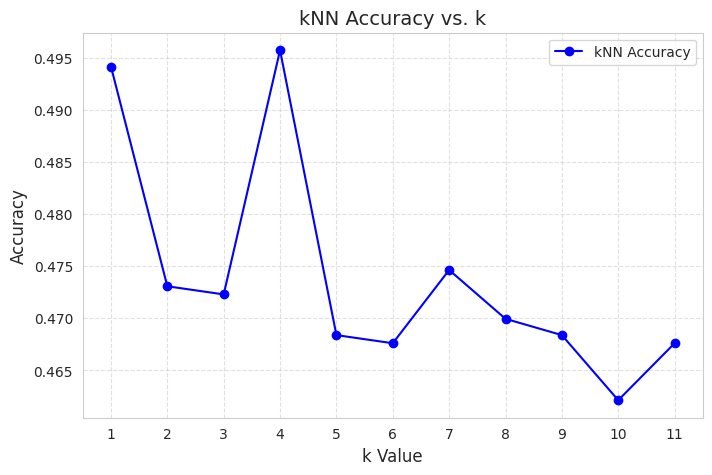

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(dataset_name)

# Identify class label column (first categorical column)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) == 0:
    raise ValueError("No categorical column found! Specify the class column manually.")

class_column = categorical_cols[0]  # Assuming first categorical column as class labels
print(f"Using '{class_column}' as the class label column.")

# Identify numerical feature columns
feature_columns = df.select_dtypes(include=[np.number]).columns
if len(feature_columns) == 0:
    raise ValueError("No numerical feature columns found!")

# Filter dataset for two classes
class_labels = df[class_column].unique()
if len(class_labels) < 2:
    raise ValueError("Dataset must have at least two classes for binary classification.")

class1, class2 = class_labels[:2]
df_binary = df[df[class_column].isin([class1, class2])]

# Define feature matrix (X) and target labels (y)
X = df_binary[feature_columns].to_numpy()
y = df_binary[class_column].to_numpy()

# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and test kNN for k = 1 to 11
k_values = range(1, 12)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"k = {k}, Accuracy = {accuracy:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue', label="kNN Accuracy")
plt.xlabel("k Value", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("kNN Accuracy vs. k", fontsize=14)
plt.xticks(k_values)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


Using ' education' as the class label column.


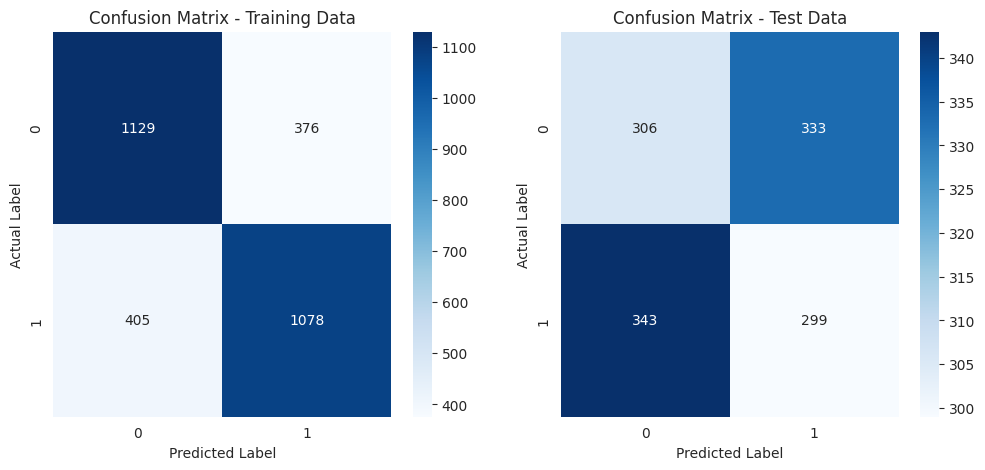


Classification Report - Training Data:
               precision    recall  f1-score   support

     Graduate       0.74      0.75      0.74      1505
 Not Graduate       0.74      0.73      0.73      1483

     accuracy                           0.74      2988
    macro avg       0.74      0.74      0.74      2988
 weighted avg       0.74      0.74      0.74      2988


Classification Report - Test Data:
               precision    recall  f1-score   support

     Graduate       0.47      0.48      0.48       639
 Not Graduate       0.47      0.47      0.47       642

     accuracy                           0.47      1281
    macro avg       0.47      0.47      0.47      1281
 weighted avg       0.47      0.47      0.47      1281

Training Accuracy: 0.7386
Test Accuracy: 0.4723

Model Analysis: Regular Fit (Balanced performance on both training and test sets)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(dataset_name)

# Identify class label column (first categorical column)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) == 0:
    raise ValueError("No categorical column found! Specify the class column manually.")

class_column = categorical_cols[0]  # Assuming first categorical column as class labels
print(f"Using '{class_column}' as the class label column.")

# Identify numerical feature columns
feature_columns = df.select_dtypes(include=[np.number]).columns
if len(feature_columns) == 0:
    raise ValueError("No numerical feature columns found!")

# Filter dataset for two classes
class_labels = df[class_column].unique()
if len(class_labels) < 2:
    raise ValueError("Dataset must have at least two classes for binary classification.")

class1, class2 = class_labels[:2]
df_binary = df[df[class_column].isin([class1, class2])]

# Define feature matrix (X) and target labels (y)
X = df_binary[feature_columns].to_numpy()
y = df_binary[class_column].to_numpy()

# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train kNN classifier (set k=3)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices using Seaborn
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.show()

# Print classification reports
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

# Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Model Fit Analysis
if train_acc > 0.95 and test_acc < 0.8:
    print("\nModel Analysis: Overfitting (High training accuracy, low test accuracy)")
elif train_acc < 0.7 and test_acc < 0.7:
    print("\nModel Analysis: Underfitting (Low accuracy on both training and test sets)")
else:
    print("\nModel Analysis: Regular Fit (Balanced performance on both training and test sets)")


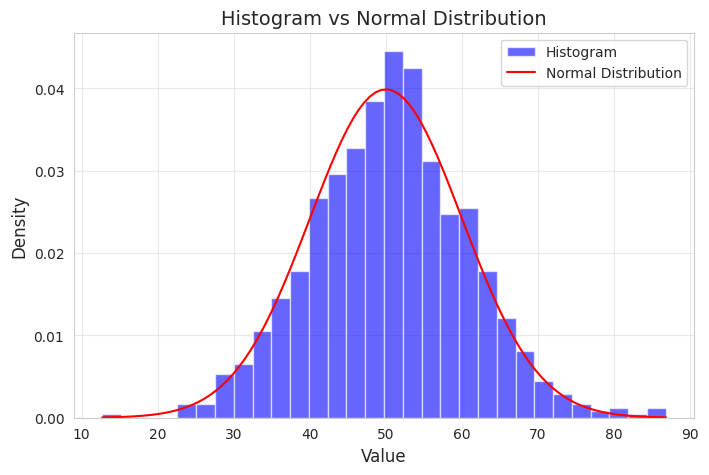

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate normally distributed data
mean = 50   # Mean of the distribution
std_dev = 10  # Standard deviation
num_samples = 1000  # Number of data points

data = np.random.normal(mean, std_dev, num_samples)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label="Histogram")

# Plot normal distribution curve
x = np.linspace(min(data), max(data), 100)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r-', label="Normal Distribution")

# Add labels and legend
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Histogram vs Normal Distribution", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.show()
